In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers

In [0]:
tf.__version__

'1.14.0'

In [0]:
def model(input_shape, kernel_size, stride, pad='same', bias=False, init=tf.initializers.he_normal()):
    inputs = layers.Input(shape=input_shape, name='input')

    #block1
    first = layers.Conv2D(64, kernel_size, strides=(2, 2), activation='relu', padding=pad, use_bias=bias, kernel_initializer=init, kernel_regularizer=keras.regularizers.l2(0), name='first1')(inputs)
    first = layers.Conv2D(64, kernel_size, strides=stride, activation='relu', padding=pad, use_bias=bias, kernel_initializer=init, kernel_regularizer=keras.regularizers.l2(0), name='first2')(first)
    first_pool = layers.MaxPool2D((2, 2), name='first_pool')(first)

    # block2
    second = layers.Conv2D(128, kernel_size, strides=stride, activation='relu', padding=pad, use_bias=bias, kernel_initializer=init, kernel_regularizer=keras.regularizers.l2(0), name='second1')(first_pool)
    second = layers.Conv2D(128, kernel_size, strides=stride, activation='relu', padding=pad, use_bias=bias, kernel_initializer=init, kernel_regularizer=keras.regularizers.l2(0), name='second2')(second)
    second_pool = layers.MaxPool2D((2, 2), name='second_pool')(second)

    # block3
    third = layers.Conv2D(256, kernel_size, strides=stride, activation='relu', padding=pad, use_bias=bias, kernel_initializer=init, kernel_regularizer=keras.regularizers.l2(0), name='third1')(second_pool)
    third = layers.Conv2D(256, kernel_size, strides=stride, activation='relu', padding=pad, use_bias=bias, kernel_initializer=init, kernel_regularizer=keras.regularizers.l2(0), name='third2')(third)
    third = layers.Conv2D(256, kernel_size, strides=stride, activation='relu', padding=pad, use_bias=bias, kernel_initializer=init, kernel_regularizer=keras.regularizers.l2(0), name='third3')(third)
    third_pool = layers.MaxPool2D((2, 2), name='third_pool')(third)

    # bloack4
    forth = layers.Conv2D(512, kernel_size, strides=stride, activation='relu', padding=pad, use_bias=bias, kernel_initializer=init, kernel_regularizer=keras.regularizers.l2(0), name='forth1')(third_pool)
    forth = layers.Conv2D(512, kernel_size, strides=stride, activation='relu', padding=pad, use_bias=bias, kernel_initializer=init, kernel_regularizer=keras.regularizers.l2(0), name='forth2')(forth)
    forth = layers.Conv2D(512, kernel_size, strides=stride, activation='relu', padding=pad, use_bias=bias, kernel_initializer=init, kernel_regularizer=keras.regularizers.l2(0), name='forth3')(forth)
    forth_pool = layers.MaxPool2D((2, 2), name='forth_pool')(forth)

    # bloack5
    fifth = layers.Conv2D(512, kernel_size, strides=stride, activation='relu', padding=pad, use_bias=bias, kernel_initializer=init, kernel_regularizer=keras.regularizers.l2(0), name='fifth1')(forth_pool)
    fifth = layers.Conv2D(512, kernel_size, strides=stride, activation='relu', padding=pad, use_bias=bias, kernel_initializer=init, kernel_regularizer=keras.regularizers.l2(0), name='fifth2')(fifth)
    fifth = layers.Conv2D(512, kernel_size, strides=stride, activation='relu', padding=pad, use_bias=bias, kernel_initializer=init, kernel_regularizer=keras.regularizers.l2(0), name='fifth3')(fifth)
    fifth_pool = layers.MaxPool2D((2, 2), name='fifth_pool')(fifth)

    # bloack6
    sixth = layers.Conv2D(4096, kernel_size=(3, 3), strides=stride, activation='relu', padding=pad, use_bias=bias, kernel_initializer=init, kernel_regularizer=keras.regularizers.l2(0), name='sixth')(fifth_pool)
    sixth = layers.Dropout(0.5)(sixth)

    # bloack7
    seventh = layers.Conv2D(4096, kernel_size=(1, 1), strides=stride, activation='relu', padding=pad, use_bias=bias, kernel_initializer=init, kernel_regularizer=keras.regularizers.l2(0), name='seventh')(sixth)
    seventh = layers.Dropout(0.5)(seventh)

    eighth = layers.Conv2D(2, kernel_size=(1, 1), strides=stride, kernel_initializer='he_normal', activation='linear', padding='valid', kernel_regularizer=keras.regularizers.l2(0), name='x')(seventh)

    return tf.keras.Model(inputs=inputs, outputs=output, name='Semantic')

In [0]:
def generator_model():
  inputs = tf.keras.layers.Input(shape=(384, ))

  first = tf.keras.layers.Dense(4*4*512, 
                                kernel_initializer=tf.initializers.he_normal(),
                                use_bias=False)(inputs)
  
  second = tf.keras.layers.Reshape((4, 4, 512))(first)
  third = tf.keras.layers.Conv2DTranspose(256, kernel_size = (5, 5), strides=(2, 2), padding='same', use_bias=False,
                                         kernel_initializer=tf.initializers.he_normal())(second) # 8
  third = tf.keras.layers.BatchNormalization()(third)
  third = tf.keras.layers.ReLU()(third)
  
  
  forth = tf.keras.layers.Conv2DTranspose(128, kernel_size = (5, 5), strides=(2, 2), padding='same', use_bias=False,
                                         kernel_initializer=tf.initializers.he_normal())(third) # 16
  forth = tf.keras.layers.BatchNormalization()(forth)
  forth = tf.keras.layers.ReLU()(forth)
  
  
  fifth = tf.keras.layers.Conv2DTranspose(64, kernel_size = (5, 5), strides=(2, 2), padding='same', use_bias=False,
                                         kernel_initializer=tf.initializers.he_normal())(forth) # 16
  fifth = tf.keras.layers.BatchNormalization()(fifth)
  fifth = tf.keras.layers.ReLU()(fifth)

  sixth = tf.keras.layers.Conv2DTranspose(32, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, 
                                               kernel_initializer=tf.initializers.he_normal(), activation=tf.nn.softsign)(fifth)
  sixth = tf.keras.layers.BatchNormalization()(sixth)
  sixth = tf.keras.layers.ReLU()(sixth)

  gen_images = tf.keras.layers.Conv2DTranspose(1, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, 
                                               kernel_initializer=tf.initializers.he_normal(), activation=tf.nn.softsign)(sixth)

  return tf.keras.Model(inputs = inputs, outputs = gen_images, name="Generator")

In [0]:
generator = generator_model()

In [0]:
encoder = encoder_model()

In [0]:
encoder.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 64)        4800      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       204800    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 128)       512 

In [0]:
generator.summary()

Model: "Generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 384)]             0         
_________________________________________________________________
dense (Dense)                (None, 8192)              3145728   
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 256)         3276800   
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 256)         1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 128)       81

In [0]:
def discriminator_model():  
  inputs = tf.keras.layers.Input(shape=(128, 128, 1))

  second = tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', use_bias=False,
                                 kernel_initializer=tf.initializers.he_normal())(inputs) # 16
  second = tf.keras.layers.LeakyReLU()(second)
  second = tf.keras.layers.BatchNormalization()(second)
  
  third = tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same', use_bias=False,
                                kernel_initializer=tf.initializers.he_normal())(second) # 8
  third = tf.keras.layers.LeakyReLU()(third)
  third = tf.keras.layers.BatchNormalization()(third)

  forth = tf.keras.layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same', use_bias=False,
                                kernel_initializer=tf.initializers.he_normal())(third)
  forth = tf.keras.layers.LeakyReLU()(forth)
  forth = tf.keras.layers.BatchNormalization()(forth)
  
  fifth = tf.keras.layers.Conv2D(384, (5, 5), strides=(2, 2), padding='same', use_bias=False,
                                kernel_initializer=tf.initializers.he_normal())(forth) # 4
  fifth = tf.keras.layers.LeakyReLU()(fifth)
  fifth = tf.keras.layers.BatchNormalization()(fifth)

  
  sixth = tf.keras.layers.Flatten()(fifth)
  sixth = tf.keras.layers.Dropout(0.4)(sixth)
  
  outputs = tf.keras.layers.Dense(1, kernel_initializer=tf.initializers.he_normal(), use_bias=False, activation = tf.nn.sigmoid)(sixth)
  
    
  return tf.keras.Model(inputs = inputs, outputs = outputs, name = "Discriminator")

In [0]:
discriminator = discriminator_model()

In [0]:
discriminator.summary()

Model: "Discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        1600      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 128)       204800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 128)     

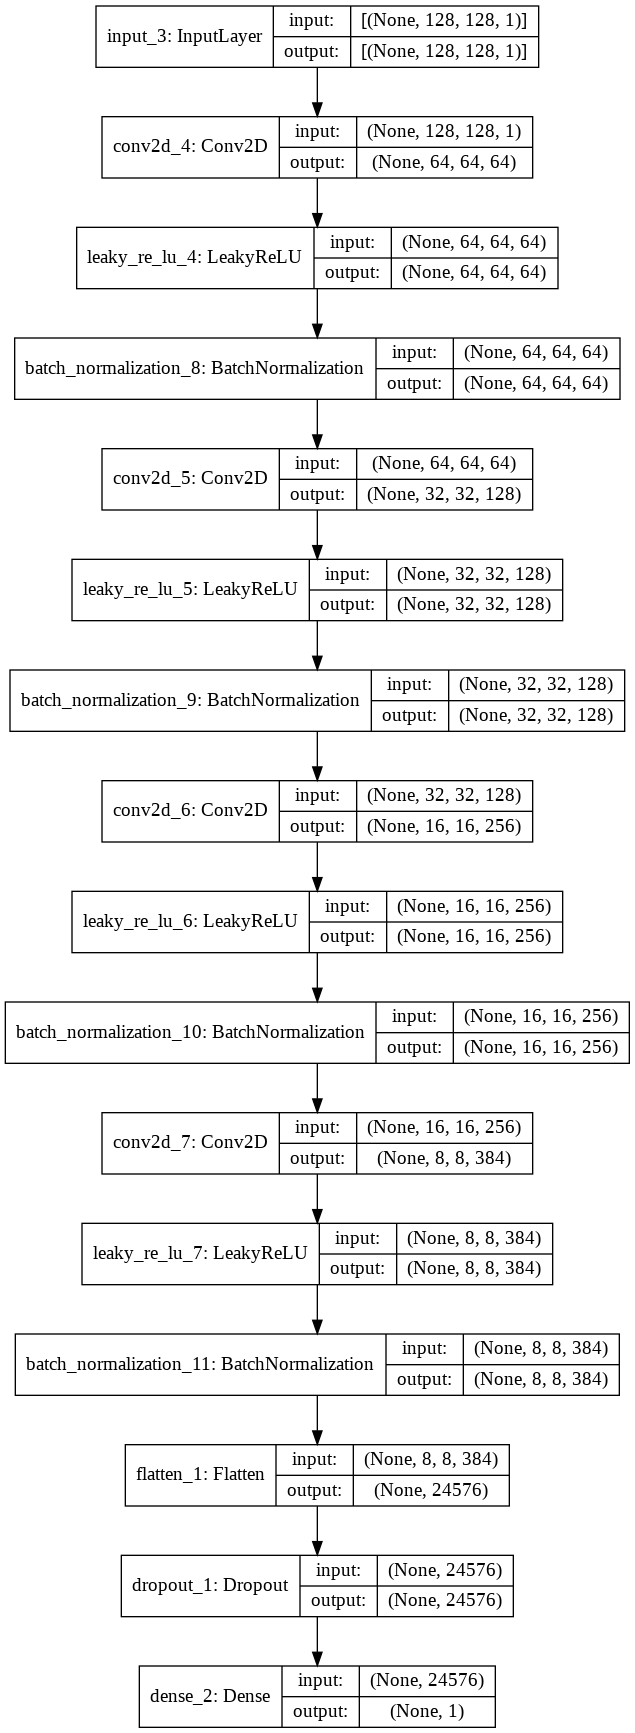

In [0]:
keras.utils.plot_model(encoder, 'encoder.png', show_shapes=True)
keras.utils.plot_model(generator, 'generator.png', show_shapes=True)
keras.utils.plot_model(discriminator, 'discriminator.png', show_shapes=True)

In [0]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()


def generator_loss(dis_gene_output):
    #return tf.nn.sigmoid_cross_entropy_with_logits(labels = tf.ones_like(dis_gene_output), logits = dis_gene_output)
    #return cross_entropy(tf.ones_like(gene_output), gene_output)
    return cross_entropy(y_true=tf.ones_like(dis_gene_output), y_pred=dis_gene_output)


def discriminator_loss(dis_real_output, dis_gene_output):
    # [1,1,...,1] with real output since it is true and we want our generated examples to look like it
    #real_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(dis_real_output), logits=dis_real_output)
    real_loss = cross_entropy(y_true=tf.ones_like(dis_real_output), y_pred=dis_real_output)

    # [0,0,...,0] with generated images since they are fake
    #gene_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(dis_gene_output), logits=dis_gene_output)
    gene_loss = cross_entropy(y_true=tf.zeros_like(dis_gene_output), y_pred=dis_gene_output)

    total_loss = real_loss + gene_loss

    return total_loss

In [0]:
#generator_optimizer = tf.optimizers.Adam(5e-4, beta_1 = 0.5, beta_2 = 0.999, epsilon=1e-4)
#discriminator_optimizer = tf.optimizers.Adam(5e-4, beta_1 = 0.5, beta_2 = 0.999, epsilon=1e-4)

generator_optimizer = tf.keras.optimizers.Adam(1e-3, epsilon=1e-3)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-3, epsilon=1e-3)

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, ConvLSTM2D, ReLU, concatenate, Subtract, Reshape, Input
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Google 드라이브를 마운트하려면 이 셀을 실행하세요.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def imgLoad(folder, shape, gray=True):
  im_dir = os.path.join("/content/drive/My Drive/workspace/Python/ML_Basic/Images", folder)
  x_train = []
  #x_train.append(np.zeros(shape, dtype=np.float32))
  
  file_list = os.listdir(im_dir)
  file_list = sorted(file_list, key=str.lower)
  for name in file_list:
      print(os.path.join(im_dir, name))
      if gray:
        im = cv2.imread(os.path.join(im_dir, name), 0)
        im = np.expand_dims(im, -1)
        # plt.imshow(im)
        # plt.colorbar()
        # plt.grid(False)
        # plt.show()
      else:
        im = cv2.imread(os.path.join(im_dir, name))
        # plt.imshow(im)
        # plt.colorbar()
        # plt.grid(False)
        # plt.show()
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
      im = cv2.resize(im, dsize = shape[:2])
      im = im.astype(np.float32)/255.
      x_train.append(im)

  # print(os.path.join(im_dir, file_list[0]))
  # im = cv2.imread(os.path.join(im_dir, file_list[0]), 0)
  # im = cv2.resize(im, dsize = (64, 64))
  # im = im.astype(np.float32)/255.
  # # im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  # x_train.append(im)

  # x_train = np.array(x_train)    
  return np.array(x_train)
  

In [0]:
# imgSet = imgLoad('ball_imgs')
shape = (128, 128, 3)
imgSet = imgLoad('trainImg', shape, False)
imgGTSet = imgLoad('GroundTruth', shape, True)

/content/drive/My Drive/workspace/Python/ML_Basic/Images/trainImg/106024.jpg
/content/drive/My Drive/workspace/Python/ML_Basic/Images/trainImg/153077.jpg
/content/drive/My Drive/workspace/Python/ML_Basic/Images/trainImg/153093.jpg
/content/drive/My Drive/workspace/Python/ML_Basic/Images/trainImg/181079.jpg
/content/drive/My Drive/workspace/Python/ML_Basic/Images/trainImg/189080.jpg
/content/drive/My Drive/workspace/Python/ML_Basic/Images/trainImg/208001.jpg
/content/drive/My Drive/workspace/Python/ML_Basic/Images/trainImg/209070.jpg
/content/drive/My Drive/workspace/Python/ML_Basic/Images/trainImg/21077.jpg
/content/drive/My Drive/workspace/Python/ML_Basic/Images/trainImg/227092.jpg
/content/drive/My Drive/workspace/Python/ML_Basic/Images/trainImg/24077.jpg
/content/drive/My Drive/workspace/Python/ML_Basic/Images/trainImg/271008.jpg
/content/drive/My Drive/workspace/Python/ML_Basic/Images/trainImg/304074.jpg
/content/drive/My Drive/workspace/Python/ML_Basic/Images/trainImg/326038.jpg
/

(151, 128, 128, 3)

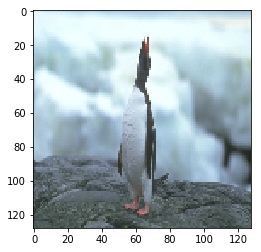

In [0]:
plt.imshow(imgSet[0])
imgSet.shape

In [0]:
import matplotlib.pyplot as plt
import cv2

In [0]:
def upscal(datasets):
  data = []
  
  for image in datasets:
    new_image = cv2.resize(image, dsize=(128, 128))
    data.append(new_image)

  return np.array(data)

In [0]:
train_images = upscal(imgSet)
train_truth = upscal(imgGTSet)

In [0]:
BUFFER_SIZE = 100000
BATCH_SIZE = 128

train_images = (train_images.astype('float32'))
train_truth = (train_truth.astype('float32'))

In [0]:
#train_images = np.concatenate((train_images, test_images), axis = 0
print(train_images.shape)
print(train_truth.shape)

(151, 128, 128, 3)
(151, 128, 128)


float32


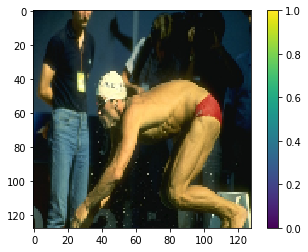

In [0]:
print(train_images[1].dtype)
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
import random
from scipy import ndimage

def data_augmentation(images, labels):
    aug_images = []
    aug_labels = []    
    
    for x, y in zip(images, labels):        
        aug_images.append(x)
        aug_labels.append(y)
        bg_value = np.median(x)
        
        for _ in range(8):
            angle = random.randint(-2, 2)
            rot_img = ndimage.rotate(x, angle, reshape=False, cval=bg_value)
            rot_label = ndimage.rotate(y, angle, reshape=False, cval=bg_value)
            
            shift = np.random.randint(-1, 1)
            shift_img = ndimage.shift(rot_img, shift, cval=bg_value)            
            shift_label = ndimage.shift(rot_label, shift, cval=bg_value)

            # fliped_parameter = np.random.randint(2, size=1)
            # fliped_parameter -= 1
            # fliped_over_img = cv2.flip(x, fliped_parameter)
            # fliped_over_label = cv2.flip(y, fliped_parameter)
            
            aug_images.append(shift_img)
            aug_images.append(rot_img)
            # aug_images.append(fliped_over_img)

            
            aug_labels.append(shift_label)
            aug_labels.append(rot_label)
            # aug_labels.append(fliped_over_label)

    aug_images = np.array(aug_images)
    aug_labels = np.array(aug_labels)
    return aug_images, aug_labels

In [0]:
EPOCHS = 100
noise_dim = 100

# We'll re-use this random vector used to seed the generator so
# it will be easier to see the improvement over time.
def random_vector_for_generation(batch_size):
#   return tf.random.normal([batch_size, noise_dim], mean, std, dtype=np.float32)
  return tf.random.normal([batch_size, noise_dim], dtype=np.float32) 

In [0]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".

@tf.function
def grad(images, encoding):
  with tf.GradientTape() as gene_tape, tf.GradientTape() as disc_tape:
    gene_images = generator(encoding, training=True)
    
    disc_real = discriminator(images, training=True)
    disc_gene = discriminator(gene_images, training=True)
    
    gene_loss = generator_loss(disc_gene)
    disc_loss = discriminator_loss(disc_real, disc_gene)
    print(gene_loss)
    print(disc_loss)
  gene_gradients = gene_tape.gradient(gene_loss, generator.trainable_variables)
  disc_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
  
  generator_optimizer.apply_gradients(zip(gene_gradients, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(disc_gradients, discriminator.trainable_variables))

In [0]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".

@tf.function
def grad(images, encoding, k):
  for _ in range(k):
    with tf.GradientTape() as gene_tape, tf.GradientTape() as disc_tape:
      gene_images = generator(encoding, training=True)
    
      disc_real = discriminator(images[1], training=True)
      disc_gene = discriminator(gene_images, training=True)
    
      gene_loss = generator_loss(disc_gene)
      disc_loss = discriminator_loss(disc_real, disc_gene)
      
      print(gene_loss)
      print(disc_loss)
      
    gene_gradients = gene_tape.gradient(gene_loss, generator.trainable_variables)
    disc_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(disc_gradients, discriminator.trainable_variables))  
  generator_optimizer.apply_gradients(zip(gene_gradients, generator.trainable_variables))

In [0]:
train_images, train_truth = data_augmentation(train_images, train_truth)

In [0]:
print(train_images.shape)
print(train_truth.shape)

(2567, 128, 128, 3)
(2567, 128, 128)


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, np.expand_dims(train_truth, -1))).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [0]:
# # Notice the use of `tf.function`
# # This annotation causes the function to be "compiled".

# @tf.function
# def grad(images, encoding, k):
#   for _ in range(k):
#     with tf.GradientTape() as gene_tape, tf.GradientTape() as disc_tape:
#       gene_images = generator(encoding, training=True)
#       disc_real = discriminator(images[1], training=True)
#       disc_gene = discriminator(gene_images, training=True)
    
#       disc_loss = discriminator_loss(disc_real, disc_gene)
#       if _ != k-1:
#         gene_loss = -disc_loss
#       else:
#         gene_loss = generator_loss(disc_gene)
        
#     disc_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#     discriminator_optimizer.apply_gradients(zip(disc_gradients, discriminator.trainable_variables))  
#     gene_gradients = gene_tape.gradient(gene_loss, generator.trainable_variables)
#     generator_optimizer.apply_gradients(zip(gene_gradients, generator.trainable_variables))

In [0]:
EPOCHS = 1000

In [0]:
%%time

import time
sample_n = 16

for epoch in range(EPOCHS):
  start = time.time()
  print("Start Epoch_{}'s Training".format(epoch+1))
  for images in train_dataset:
    encoding = encoder(images[0])
    grad(images, encoding, 3)

  print ('Time taken for epoch {} is {} sec '.format(epoch + 1, time.time()-start))
  
  print("Checking")
  data_point = np.random.randint(150, size=1)
  print(data_point, "'s image")

  fig = plt.figure()
  plt.subplot(1, 2, 1)
  plt.imshow(train_truth[data_point[0]], cmap='gray')

  generated_img = generator(encoder(tf.expand_dims(train_images[data_point[0]], 0)))
  print(generated_img.shape)
  generated_img = np.reshape(generated_img, (128, 128))
  
  plt.subplot(1, 2, 2)
  plt.imshow(generated_img[1:], cmap='gray')
  plt.show()
  # print_noise = tf.random.normal([sample_n, noise_dim])
  # gen_images = generator(print_noise)
  
  # k = 0
  # fig, ax = plt.subplots(4, 4)
  # for j in range(4):
  #   for i in range(4):
  #     ax[j][i].set_axis_off()
  #     ax[j][i].imshow(gen_images[k, :, :, :])
  #     k += 1

  # plt.savefig('{}.png'.format(str(epoch+1).zfill(3)), bbox_inches='tight')
  # plt.show(fig)
  # plt.close(fig)

Start Epoch_1's Training
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("add:0", shape=(), dtype=float32)
Tensor("binary_crossentropy_3/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("add_7:0", shape=(), dtype=float32)
Tensor("binary_crossentropy_6/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("add_14:0", shape=(), dtype=float32)
